In [1]:
import yfinance as yf

# Step 1: Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Step 2: Reset the index
tesla_data.reset_index(inplace=True)

# Step 3: Save the dataframe to a CSV file
tesla_data.to_csv('tesla_stock_data.csv', index=False)

# Step 4: Display the first five rows of the dataframe
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website containing Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Step 1: Send a GET request to fetch the web page
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Step 2: Parse the web page content
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Step 3: Find the table containing revenue data
    # Note: We will use a more generic approach to search for the table
    table = soup.find('table', {'class': 'historical_data_table table'})
    
    # Check if the table was found
    if table:
        # Step 4: Extract table rows
        rows = table.find_all('tr')
        revenue_data = []
        
        # Loop through the rows and extract data
        for row in rows[1:]:  # Skipping the first row (header)
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]  # Clean up the data
            revenue_data.append(cols)
        
        # Convert the list into a DataFrame
        tesla_revenue = pd.DataFrame(revenue_data, columns=['Date', 'Revenue'])
        
        # Step 5: Display the last five rows of the DataFrame
        print(tesla_revenue.tail())
    else:
        print("Table not found. Please check the class name and HTML structure.")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


Failed to retrieve the webpage. Status code: 403


In [3]:
import yfinance as yf

# Step 1: Download GameStop stock data
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")

# Step 2: Reset the index
gme_data.reset_index(inplace=True)

# Step 3: Save the dataframe to a CSV file
gme_data.to_csv('gamestop_stock_data.csv', index=False)

# Step 4: Display the first five rows of the dataframe
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website containing GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Step 1: Send a GET request to fetch the web page
response = requests.get(url)

# Step 2: Parse the web page content
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find the table containing revenue data
table = soup.find('table', {'class': 'historical_data_table table'})

# Check if the table was found
if table:
    # Step 4: Extract table rows
    rows = table.find_all('tr')
    revenue_data = []

    for row in rows[1:]:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        revenue_data.append(cols)

    # Convert the list into a DataFrame
    gme_revenue = pd.DataFrame(revenue_data, columns=['Date', 'Revenue'])

    # Step 5: Display the last five rows of the DataFrame
    print(gme_revenue.tail())
else:
    print("Table not found. Please check the class name and HTML structure.")


Table not found. Please check the class name and HTML structure.


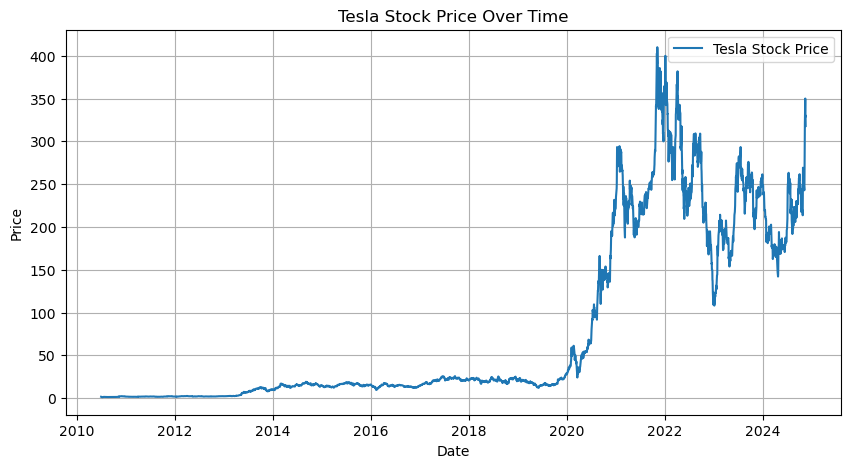

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Step 2: Reset the index
tesla_data.reset_index(inplace=True)

# Step 3: Save the dataframe to a CSV file (optional)
tesla_data.to_csv('tesla_stock_data.csv', index=False)

# Step 4: Define the make_graph function
def make_graph(stock_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Tesla Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 5: Call the make_graph function with tesla_data
make_graph(tesla_data, 'Tesla Stock Price Over Time')
